In [2]:
import os,shutil
original_dataset_dir = './datasets/cats_and_dogs/train'
base_dir = './datasets/cats_and_dogs_small'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
# os.mkdir(validation_cats_dir);

validation_dogs_dir = os.path.join(validation_dir,'dogs')
# os.mkdir(validation_dogs_dir);

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)


In [3]:
fnames = ['cat.{}.jpg'.format(i) for i  in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i  in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i  in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)

In [4]:
fnames = ['dog.{}.jpg'.format(i) for i  in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i  in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i  in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
from tensorflow import keras
from keras import optimizers


model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 118ms/step - loss: 0.6886 - acc: 0.5430 - val_loss: 0.6690 - val_acc: 0.5640
Epoch 2/30
100/100 [==============================] - 4s 39ms/step - loss: 0.6623 - acc: 0.5990 - val_loss: 0.6478 - val_acc: 0.6080
Epoch 3/30
100/100 [==============================] - 4s 37ms/step - loss: 0.6133 - acc: 0.6565 - val_loss: 0.6615 - val_acc: 0.5950
Epoch 4/30
100/100 [==============================] - 4s 38ms/step - loss: 0.5705 - acc: 0.6915 - val_loss: 0.5992 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 4s 37ms/step - loss: 0.5406 - acc: 0.7210 - val_loss: 0.6781 - val_acc: 0.5960
Epoch 6/30
100/100 [==============================] - 4s 38ms/step - loss: 0.5171 - acc: 0.7300 - val_loss: 0.5743 - val_acc: 0.7060
Epoch 7/30
100/100 [==============================] - 4s 38ms/step - loss: 0.4911 - acc: 0.7670 - val_loss: 0.6189 - val_acc: 0.6710
Epoch 8/30
100/100 [==============================] - 4s 37ms/step 

In [10]:
model.save('cats_and_dogs_small_1.h5')

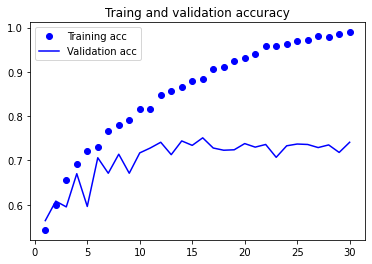

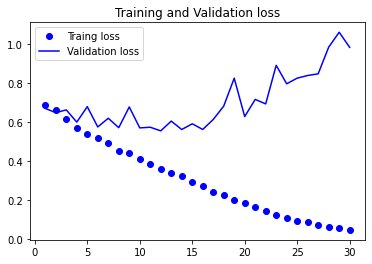

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Traing and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Traing loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
##개별 이미지 전처리

In [2]:
img_path = './datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import  image
import  numpy as np

img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /=255.

print(img_tensor.shape)

(1, 150, 150, 3)


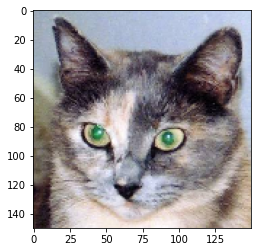

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [10]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [11]:
activations = activation_model.predict(img_tensor)

In [13]:
first_layer_activation = activations[0]

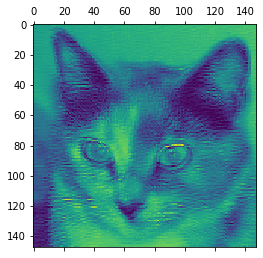

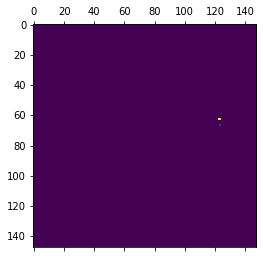

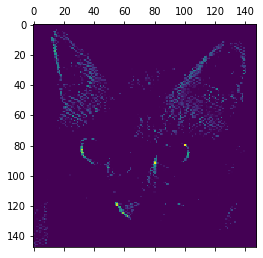

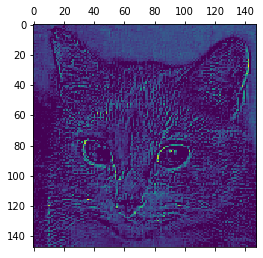

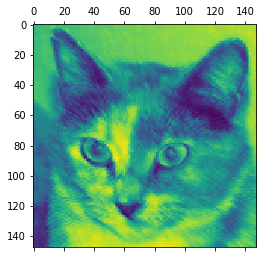

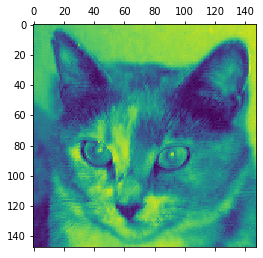

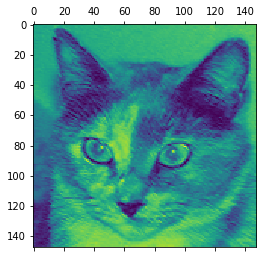

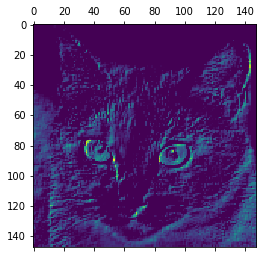

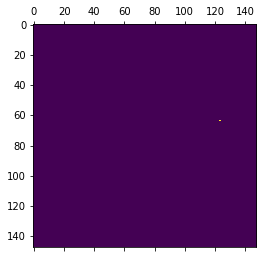

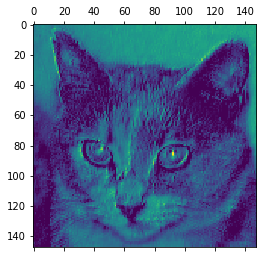

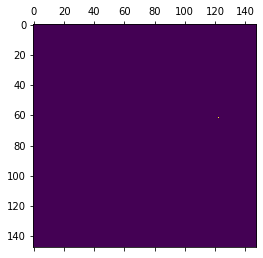

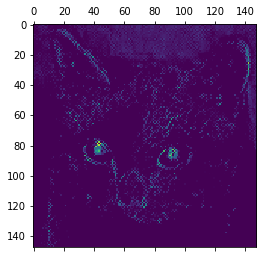

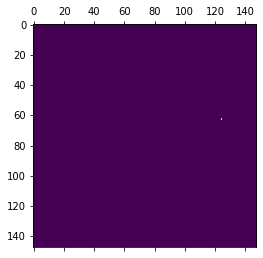

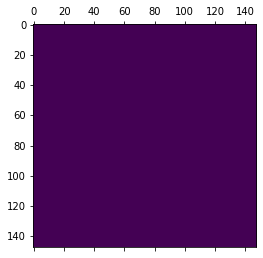

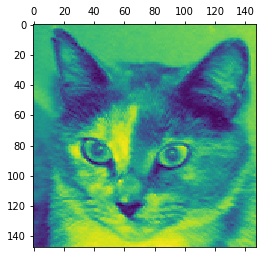

In [16]:
import matplotlib.pyplot as plt

for i in range(15):
    plt.matshow(first_layer_activation[0,:,:,i],cmap='viridis')
